# Stable Diffusion

## Data Preprocessing

In [ ]:
import pandas as pd
from datasets import Dataset
from PIL import Image
import requests
from io import BytesIO

dataset = pd.read_csv('/content/drive/MyDrive/Data_Project/photos.tsv000', delimiter='\t')

image_urls = dataset['photo_image_urls'].tolist()
descriptions = dataset['photo_descriptions'].tolist()

def download_image(url):
    """
    Download images and preprocess them.
    """
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    return img

images = [download_image(url) for url in image_urls]

data = {
    "image": images,
    "text": descriptions
}

# Prepared Dataset
dataset = Dataset.from_dict(data)

## Preprocess Images

In [ ]:
from transformers import CLIPProcessor

processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

def preprocess(example):
    """ 
    Process image and text.
    """
    inputs = processor(text=example["text"], images=example["image"], return_tensors="pt", padding=True)
    return inputs

dataset = dataset.map(preprocess, batched=True)

## Fine-Tune the Model

In [ ]:
from diffusers import DiffusionPipeline
from torch.utils.data import DataLoader
from transformers import Trainer, TrainingArguments

# Loading the pre-trained Stable Diffusion model from Hugging Face
pipe = DiffusionPipeline.from_pretrained("dreamlike-art/dreamlike-diffusion-1.0")
pipe.to("cuda")  

# Dataloader for the train datatset
train_dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Training arguments
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Diffusion/output",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=8,
    evaluation_strategy="steps",
    save_steps=500,
    logging_dir="content/drive/MyDrive/Diffusion/logs",
    logging_steps=100,
    save_total_limit=3,
    fp16=True,
)

# Hugging Face trainer
trainer = Trainer(
    model=pipe,
    args=training_args,
    train_dataset=dataset,
    data_collator=None,  
)

# Fine-tuning the model
trainer.train()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

## Example Outputs

### Output 1

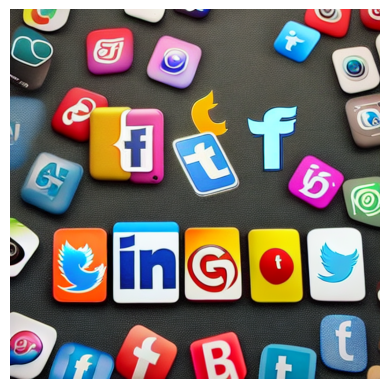

In [ ]:
import matplotlib.pyplot as plt

prompt = "A vibrant social media post."
image1 = pipe(prompt).images[0]

plt.imshow(image1)
plt.axis('off')  
plt.show()

### Output 2

  0%|          | 0/50 [00:00<?, ?it/s]

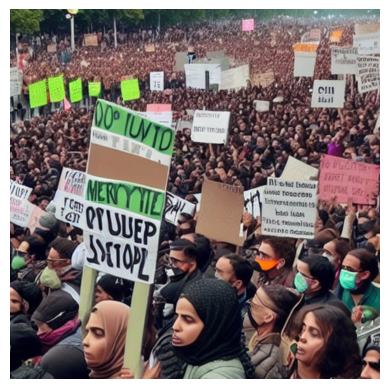

In [ ]:
prompt = "A social media post about protest."
image2 = pipe(prompt).images[0]

plt.imshow(image2)
plt.axis('off')  
plt.show()